In [3]:
import os
import pandas as pd

In [4]:
%pwd

'c:\\Users\\surface\\OneDrive\\Desktop\\Instacart_Market_Analysis\\Instacart-Market-Analysis-Project\\Research'

In [5]:
os.chdir('../')

In [6]:
%pwd

'c:\\Users\\surface\\OneDrive\\Desktop\\Instacart_Market_Analysis\\Instacart-Market-Analysis-Project'

In [8]:
df_aisles = pd.read_csv("Instacart_Data/aisles.csv")
df_departments = pd.read_csv("Instacart_Data/departments.csv")
df_order_products_prior = pd.read_csv("Instacart_Data/order_products_prior.csv")
df_order_products_train = pd.read_csv("Instacart_Data/order_products_train.csv")
df_orders = pd.read_csv("Instacart_Data/df_orders_clean.csv")
df_products = pd.read_csv("Instacart_Data/products.csv")

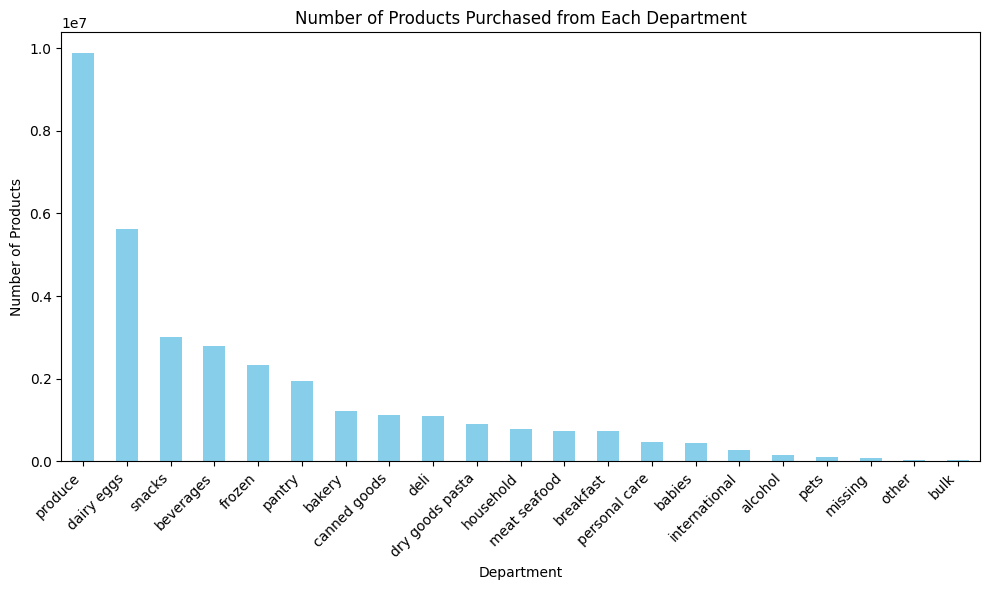

In [9]:
import matplotlib.pyplot as plt
#products/ order_products_prior /order_products_train dataframes
merged_order_products = pd.concat([df_order_products_prior, df_order_products_train])
merged_data = pd.merge(merged_order_products, df_products, on='product_id', how='left')

# departments dataframe to get department names
merged_data = pd.merge(merged_data, df_departments, on='department_id', how='left')

# Group by department for number of products in each department
department_counts = merged_data.groupby('department')['product_id'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
department_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Products Purchased from Each Department')
plt.xlabel('Department')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

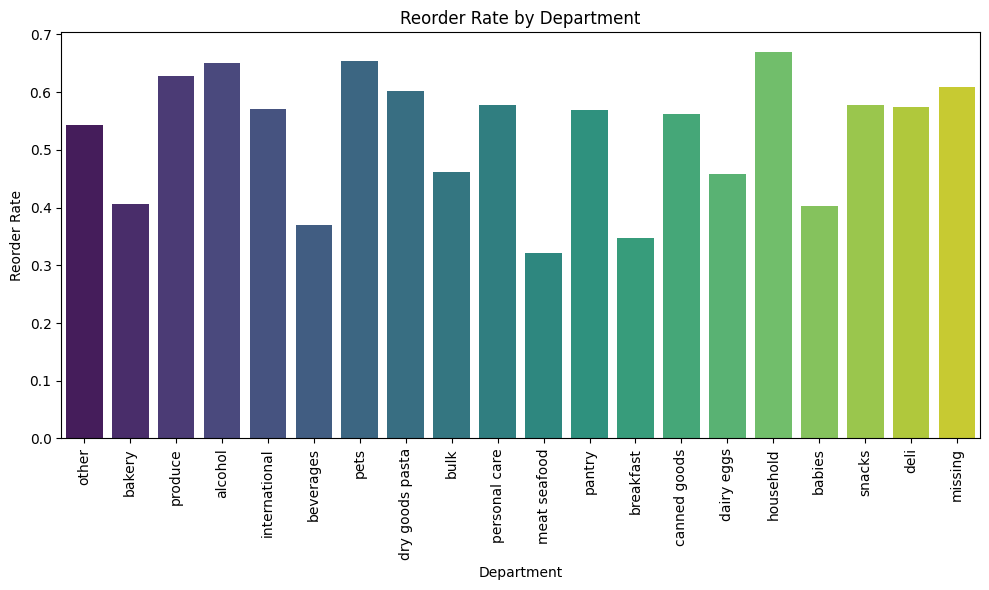

In [10]:
import seaborn as sns
# Calculate reorder rate by department
reorder_rate_by_department = merged_data.groupby('department_id')['reordered'].mean()

# Filter reorder_rate_by_department to include only department IDs present in df_departments
reorder_rate_by_department = reorder_rate_by_department[reorder_rate_by_department.index.isin(df_departments.index)]

# Plot the reorder rate by department
plt.figure(figsize=(10, 6))
sns.barplot(x=df_departments.loc[reorder_rate_by_department.index, 'department'], 
            y=reorder_rate_by_department.values, 
            palette='viridis')
plt.title('Reorder Rate by Department')
plt.xlabel('Department')
plt.ylabel('Reorder Rate')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
plt.tight_layout()
plt.show()

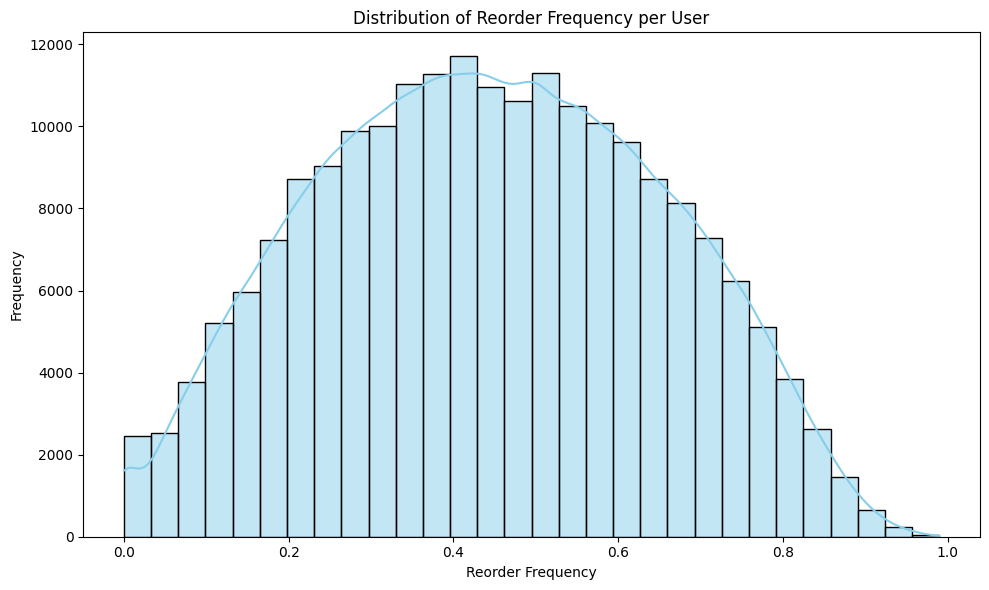

In [12]:
merged_data = pd.merge(merged_order_products, df_orders, on='order_id', how='left')

# Calculate reorder frequency per user
reorder_frequency = merged_data.groupby('user_id')['reordered'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(reorder_frequency, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Reorder Frequency per User')
plt.xlabel('Reorder Frequency')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

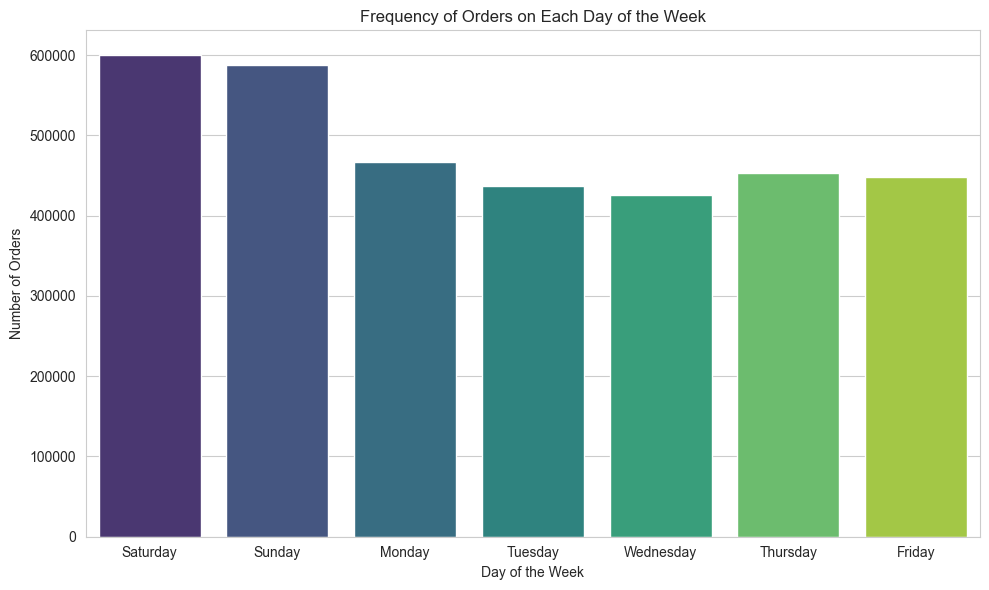

In [13]:

sns.set_style("whitegrid")

# frequency of orders on each day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df_orders, x='order_dow', palette='viridis')
plt.title('Frequency of Orders on Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(ticks=range(7), labels=['Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.tight_layout()
plt.show()

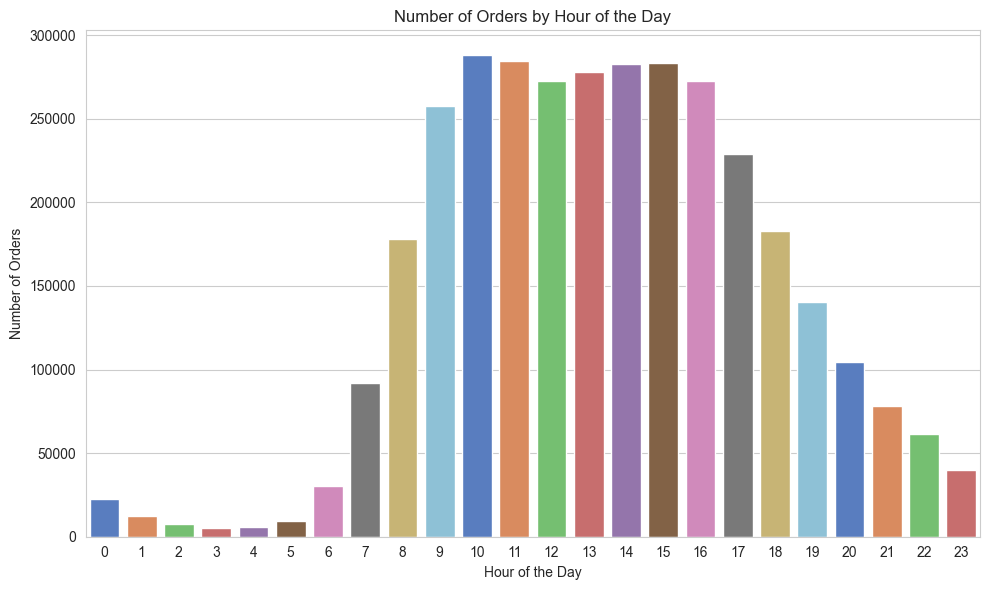

In [ ]:
#  the number of orders by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(x='order_hour_of_day', data=df_orders, palette='muted')
plt.title('Number of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

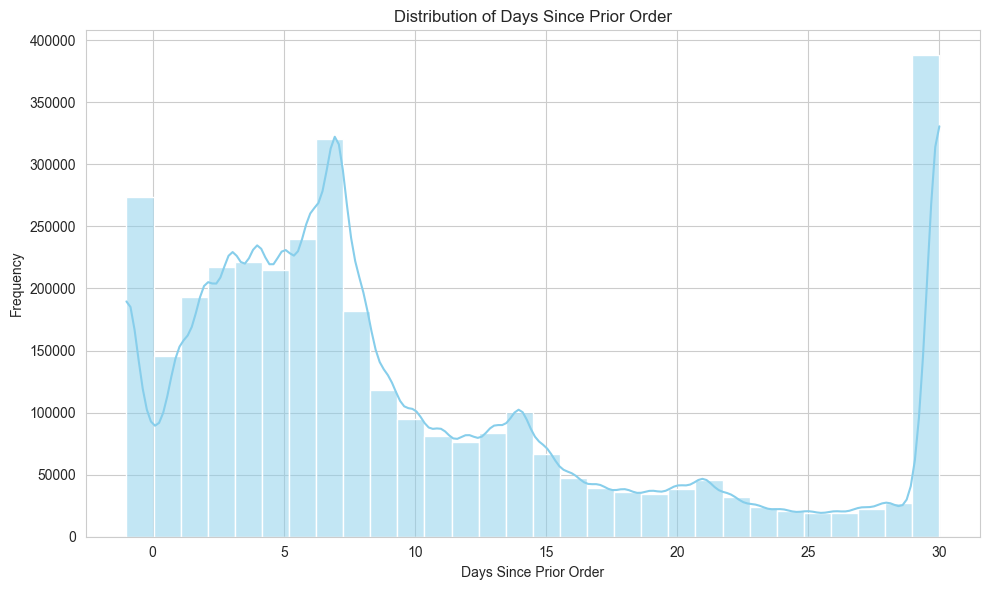

In [ ]:
# distribution of days since the prior order
plt.figure(figsize=(10, 6))
sns.histplot(df_orders['days_since_prior_order'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

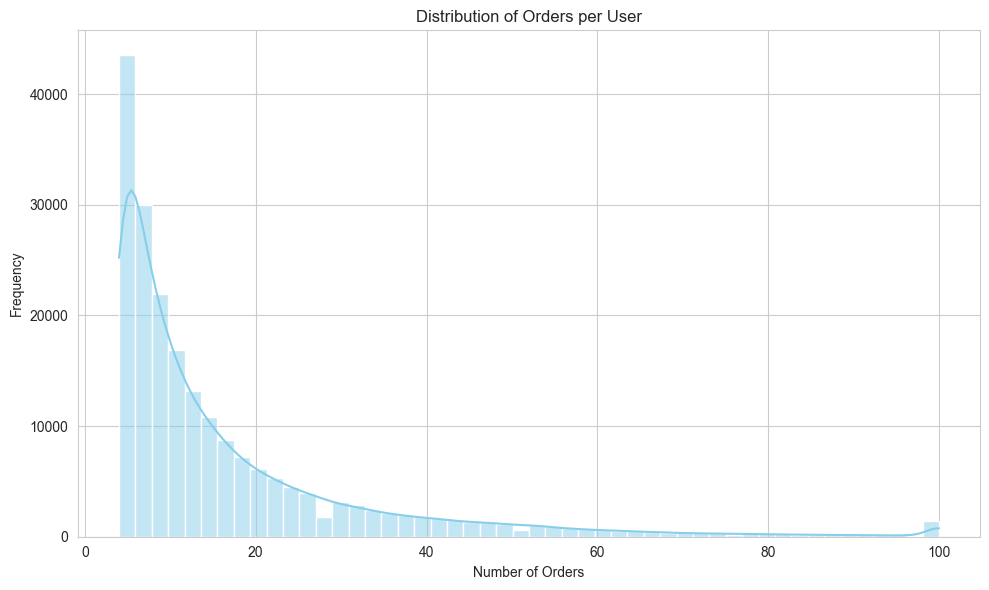

In [ ]:
# Number of orders per user
orders_per_user = df_orders.groupby('user_id')['order_id'].count()

# Visualize the distribution of orders per user
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_user, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Orders per User')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


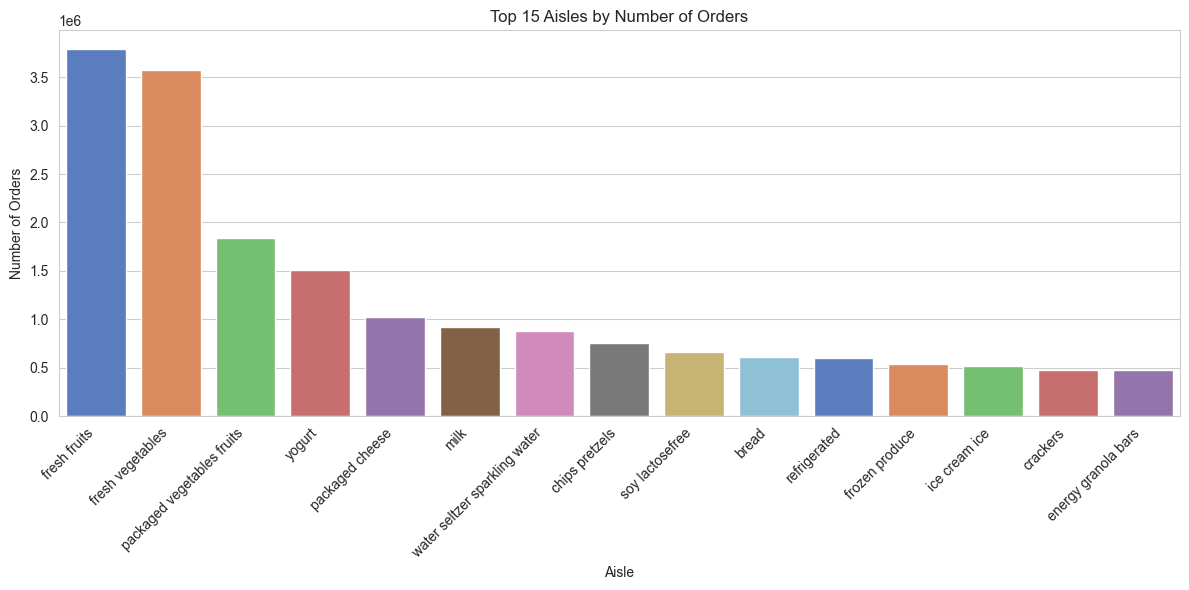

In [ ]:
# Set the value of N
top_n = 15

# Calculate the number of orders per aisle
orders_by_aisle = merged_data['aisle_id'].value_counts()

# Filter to include only the top N aisles
top_n_orders_by_aisle = orders_by_aisle.head(top_n)
# Get the aisle names corresponding to the top 15 aisles
aisle_names = df_aisles.set_index('aisle_id').loc[top_n_orders_by_aisle.index, 'aisle']

# Plot the distribution of orders by aisle for the top 15 aisles
plt.figure(figsize=(12, 6))
sns.barplot(x=aisle_names, y=top_n_orders_by_aisle.values, palette='muted')
plt.title('Top 15 Aisles by Number of Orders')
plt.xlabel('Aisle')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

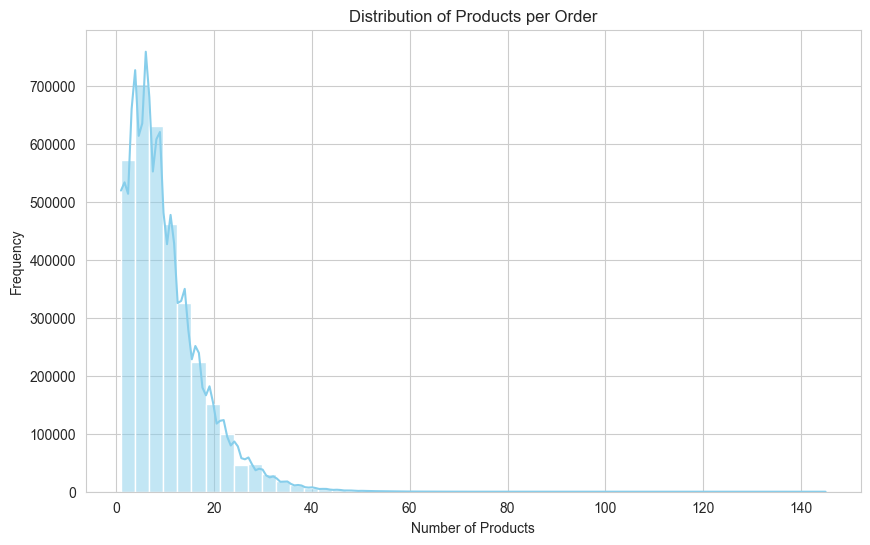

In [ ]:
# Number of products per order
products_per_order = merged_order_products.groupby('order_id')['product_id'].count()

plt.figure(figsize=(10, 6))
sns.histplot(products_per_order, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Products per Order')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.show()

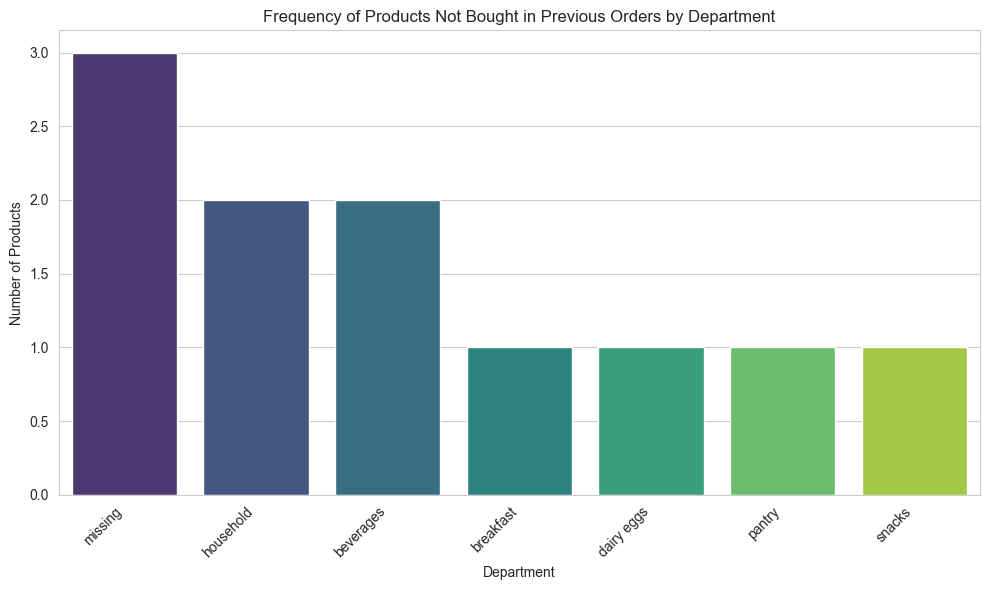

In [ ]:
# Merge product data with department data to get department names
merged_products = pd.merge(df_products, df_departments, on='department_id', how='left')

# Create a set of product IDs from order_products_prior
prior_product_ids = set(df_order_products_prior['product_id'])

# Check if each product has been bought in previous orders
merged_products['bought_in_previous_orders'] = merged_products['product_id'].apply(lambda x: x in prior_product_ids)

# Filter products that were not bought in previous orders
products_not_bought_in_previous_orders = merged_products[~merged_products['bought_in_previous_orders']]

# Count the frequency of products not bought in previous orders by department
product_frequency_by_department = products_not_bought_in_previous_orders['department'].value_counts()

# Plot the frequency of products not bought in previous orders by department
plt.figure(figsize=(10, 6))
sns.barplot(x=product_frequency_by_department.index, y=product_frequency_by_department.values, palette='viridis')
plt.title('Frequency of Products Not Bought in Previous Orders by Department')
plt.xlabel('Department')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()